# OF-driven Gaussian denoising

In [1]:
!which python

/shared/PEs/farneback-python/bin/python


In [2]:
!pip install --upgrade pip

In [3]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from ipywidgets import *
import cv2
import time
import kernels
import _2D_OF_denoising2 as _2D_OF_denoising

In [4]:
try:
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image
except:
    !pip install "image_IO @ git+https://github.com/vicente-gonzalez-ruiz/image_IO"
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image

In [5]:
sigma = 2.0

[6.69162896e-05 4.36349021e-04 2.21596317e-03 8.76430436e-03
 2.69959580e-02 6.47599366e-02 1.20987490e-01 1.76035759e-01
 1.99474648e-01 1.76035759e-01 1.20987490e-01 6.47599366e-02
 2.69959580e-02 8.76430436e-03 2.21596317e-03 4.36349021e-04
 6.69162896e-05]
1.0


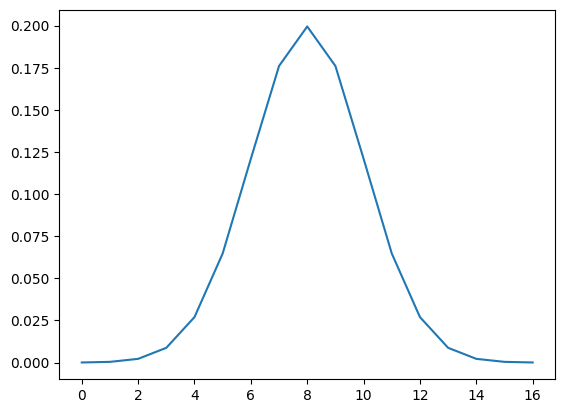

In [6]:
kernel = kernels.get_gaussian_kernel(sigma) #compute_gaussian_kernel(sigma)
print(kernel)
print(np.sum(kernel))
plt.plot(kernel)
plt.show()

In [7]:
!wget http://www.hpca.ual.es/~vruiz/images/barb.png

--2023-06-08 19:46:18--  http://www.hpca.ual.es/~vruiz/images/barb.png
Resolving www.hpca.ual.es (www.hpca.ual.es)... 150.214.150.42
Connecting to www.hpca.ual.es (www.hpca.ual.es)|150.214.150.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 232140 (227K) [image/png]
Saving to: ‘barb.png’

barb.png            100%[===================>] 226,70K  1,11MB/s    in 0,2s    

2023-06-08 19:46:18 (1,11 MB/s) - ‘barb.png’ saved [232140/232140]



In [8]:
img = gray_image.read("barb.png")

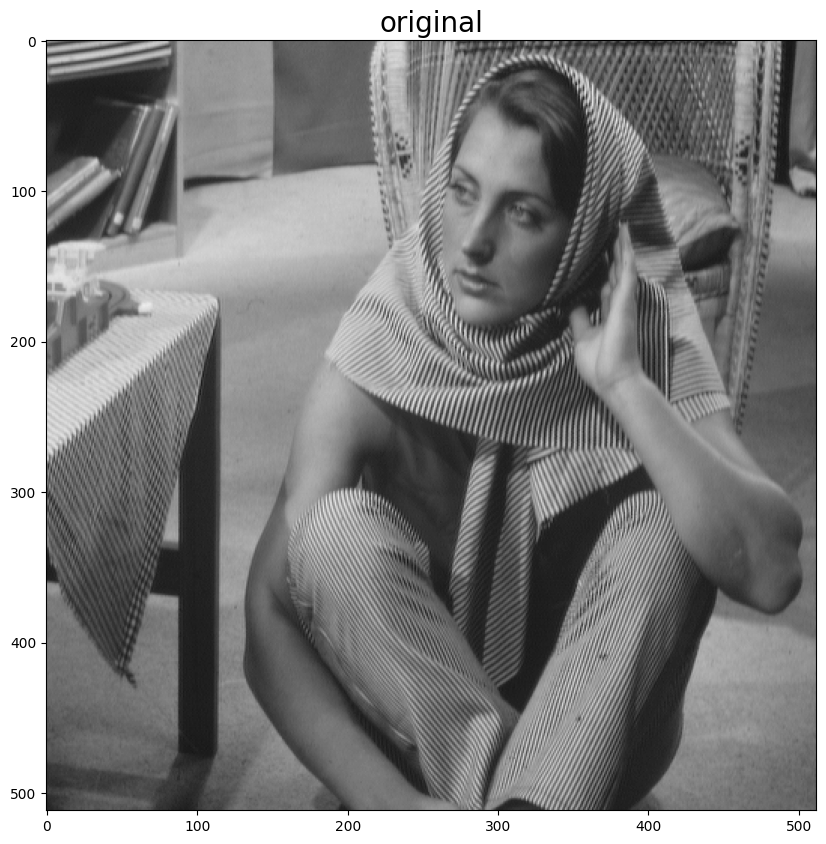

In [9]:
gray_image.show(img, "original")

In [10]:
mean = 0
var = 200
sigma = var**0.5
noise = np.random.normal(mean,sigma,img.shape).reshape(img.shape)
noisy_img = np.clip((img + noise), 0, 255).astype(np.uint8)

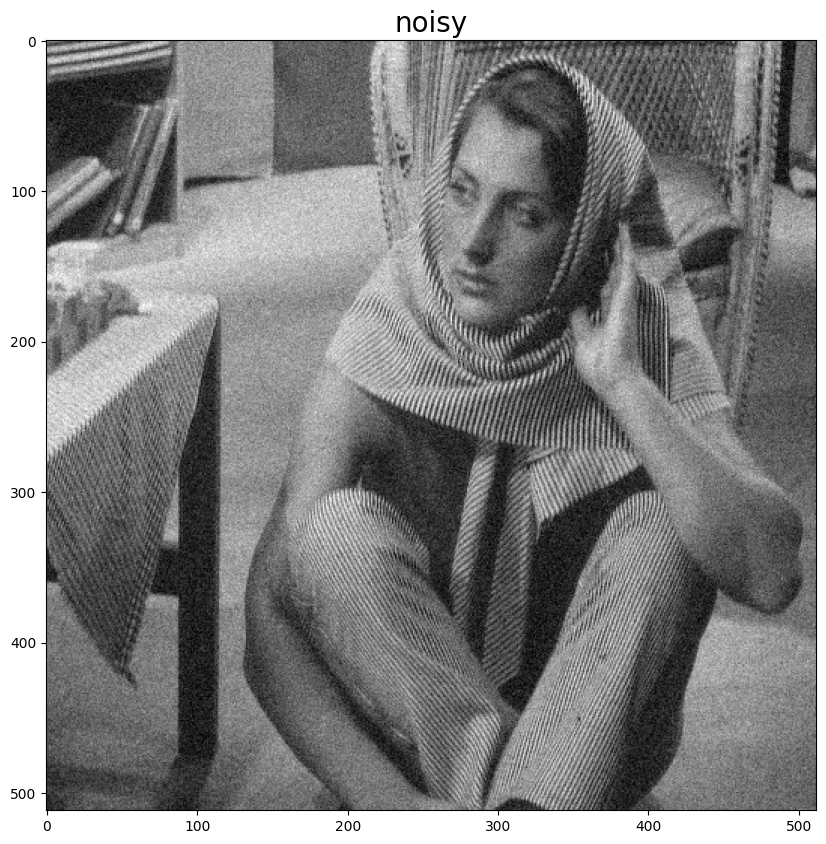

In [11]:
gray_image.show(noisy_img, "noisy")

In [12]:
denoised_img = _2D_OF_denoising.filter(noisy_img, kernel, l=1, w=33)

img.shape=(512, 512) kernel.shape=(17,) l=1 w=33
< 2.210953 >
< 2.210953 >
< 2.210953 >
< 2.210953 >
< 2.210953 >
< 2.210953 >
< 2.210953 >
< 2.210953 >
< 1.2448324 >
< 2.2540338 >
< 3.4111924 >
< 4.543198 >
< 5.1756907 >
< 5.70148 >
< 4.530935 >
< 2.8651319 >
0 < 1.4872274 >
< 1.4872274 >
< 1.4872274 >
< 1.4872274 >
< 1.4872274 >
< 1.4872274 >
< 1.4872274 >
< 0.4002257 >
< 1.2270298 >
< 2.4210322 >
< 3.4474108 >
< 4.48022 >
< 5.2119613 >
< 5.408566 >
< 4.012247 >
< 2.4324102 >
1 < 0.96392053 >
< 0.96392053 >
< 0.96392053 >
< 0.96392053 >
< 0.96392053 >
< 0.96392053 >
< 0.46529606 >
< 0.35748613 >
< 1.1454068 >
< 2.3489993 >
< 3.4127386 >
< 4.4471064 >
< 5.404125 >
< 5.8398714 >
< 4.170779 >
< 2.3100224 >
2 < 1.0025486 >
< 1.0025486 >
< 1.0025486 >
< 1.0025486 >
< 1.0025486 >
< 0.45401785 >
< 0.4557971 >
< 0.27181312 >
< 1.1145461 >
< 2.2487504 >
< 3.2699997 >
< 4.3045926 >
< 5.2208533 >
< 5.2759023 >
< 2.256741 >
< 1.4990546 >
3 < 1.0344862 >
< 1.0344862 >
< 1.0344862 >
< 1.0344862 >


< 0.16794059 >
< 0.18142094 >
< 1.0694922 >
< 2.147836 >
< 3.3027544 >
< 4.260797 >
< 5.012897 >
< 4.465985 >
< 4.6022325 >
< 3.7015917 >
36 < 3.477093 >
< 3.9446785 >
< 3.0103302 >
< 3.4344335 >
< 0.96180254 >
< 0.22733258 >
< 0.28463042 >
< 0.33204037 >
< 1.0366619 >
< 2.0602717 >
< 3.1397247 >
< 4.2852154 >
< 4.939744 >
< 4.2470174 >
< 4.173039 >
< 3.7033563 >
37 < 3.5956867 >
< 4.342678 >
< 2.8938067 >
< 3.4734273 >
< 0.9915921 >
< 0.15964997 >
< 0.25755838 >
< 0.2710493 >
< 1.0247169 >
< 2.0851135 >
< 3.1084008 >
< 4.2482038 >
< 4.971402 >
< 4.0416436 >
< 3.9752414 >
< 3.3722453 >
38 < 3.7178254 >
< 4.137713 >
< 3.1695995 >
< 3.573441 >
< 1.0649637 >
< 0.11402236 >
< 0.10795473 >
< 0.09458878 >
< 1.0468286 >
< 2.081458 >
< 3.131184 >
< 4.506855 >
< 4.968168 >
< 4.01476 >
< 3.887139 >
< 3.1926184 >
39 < 3.3485572 >
< 3.3263476 >
< 3.0853925 >
< 3.421801 >
< 0.9532696 >
< 0.099434145 >
< 0.08509177 >
< 0.06349358 >
< 1.034555 >
< 2.0944657 >
< 3.132941 >
< 4.3978353 >
< 4.7952094 >


< 5.5180054 >
< 5.8720336 >
< 6.1178827 >
72 < 2.4958405 >
< 2.2290704 >
< 2.099125 >
< 2.4561534 >
< 2.3576653 >
< 0.089022785 >
< 0.07399007 >
< 0.04697718 >
< 1.0371642 >
< 2.0672212 >
< 3.0904102 >
< 4.1633534 >
< 4.991828 >
< 5.620014 >
< 5.684662 >
< 6.0109377 >
73 < 2.4451835 >
< 2.149315 >
< 2.0837448 >
< 2.596738 >
< 2.5454621 >
< 0.09246434 >
< 0.060228653 >
< 0.0384468 >
< 1.0391115 >
< 2.0611122 >
< 3.1633005 >
< 4.2540636 >
< 4.965277 >
< 5.2963405 >
< 5.518749 >
< 5.76077 >
74 < 2.4617941 >
< 2.0968213 >
< 2.0706635 >
< 2.9078765 >
< 2.9427822 >
< 0.08160113 >
< 0.051482927 >
< 0.038053695 >
< 1.0478077 >
< 2.160458 >
< 3.1911845 >
< 4.2332225 >
< 5.0230694 >
< 5.0918827 >
< 5.1269565 >
< 5.4722037 >
75 < 2.432848 >
< 2.0733905 >
< 2.0532167 >
< 3.126919 >
< 2.7451313 >
< 0.058119055 >
< 0.05302767 >
< 0.040717263 >
< 1.0411756 >
< 2.2414823 >
< 3.3807387 >
< 5.015405 >
< 5.217208 >
< 5.335348 >
< 5.3533745 >
< 5.1026187 >
76 < 2.2284222 >
< 2.1428452 >
< 2.1277697 >
< 3.

< 0.33393705 >
< 0.27461076 >
< 0.16273777 >
< 1.0728173 >
< 2.0663075 >
< 3.0921137 >
< 4.2438736 >
< 5.2513437 >
< 5.9740896 >
< 5.7904277 >
< 6.0146832 >
109 < 3.8162506 >
< 5.4343295 >
< 5.426278 >
< 3.3227208 >
< 2.9702191 >
< 0.3714528 >
< 0.24532762 >
< 0.14698021 >
< 1.0310168 >
< 2.0601926 >
< 3.140399 >
< 4.245598 >
< 5.417358 >
< 5.688978 >
< 5.6269 >
< 5.669678 >
110 < 4.2336464 >
< 5.846213 >
< 5.6384635 >
< 3.1046584 >
< 2.8658557 >
< 0.32908323 >
< 0.22086923 >
< 0.15815935 >
< 1.0394884 >
< 2.0733812 >
< 3.3547208 >
< 4.304111 >
< 5.3216643 >
< 5.219061 >
< 5.2814617 >
< 5.9398613 >
111 < 3.7551465 >
< 6.0882735 >
< 5.4107065 >
< 2.0319397 >
< 2.8214118 >
< 0.34200388 >
< 0.2372339 >
< 0.17224896 >
< 1.0289276 >
< 2.067386 >
< 3.3215735 >
< 4.205817 >
< 5.339615 >
< 5.2118807 >
< 5.9398904 >
< 6.5088053 >
112 < 3.5123322 >
< 5.684657 >
< 4.450904 >
< 2.0054073 >
< 2.9366965 >
< 0.36306223 >
< 0.2923106 >
< 0.19362353 >
< 1.0300268 >
< 2.0508776 >
< 3.3088932 >
< 4.25453

< 6.1731386 >
< 5.777463 >
< 4.8989363 >
145 < 7.0192275 >
< 6.6910295 >
< 3.2403946 >
< 1.6873478 >
< 1.9991405 >
< 2.48349 >
< 0.089591704 >
< 0.09198586 >
< 1.0293553 >
< 2.082459 >
< 3.131322 >
< 4.29408 >
< 5.363992 >
< 5.939734 >
< 5.783294 >
< 4.3621254 >
146 < 5.362114 >
< 4.6249924 >
< 1.7076019 >
< 1.7061361 >
< 2.1657908 >
< 2.4297576 >
< 0.17307907 >
< 0.124284334 >
< 1.051412 >
< 2.097334 >
< 3.14575 >
< 4.3128295 >
< 4.9330378 >
< 5.916932 >
< 6.8426127 >
< 5.8880634 >
147 < 4.9326897 >
< 2.6703105 >
< 1.7524831 >
< 1.7576529 >
< 2.212131 >
< 2.4280717 >
< 0.21157603 >
< 0.14651702 >
< 1.0414757 >
< 2.1228101 >
< 3.3539448 >
< 4.3231754 >
< 5.084271 >
< 5.9572325 >
< 6.7885604 >
< 6.6572165 >
148 < 2.9355483 >
< 2.9499404 >
< 1.7910503 >
< 1.7905897 >
< 2.335492 >
< 2.0640578 >
< 0.21664383 >
< 0.19056365 >
< 1.0963739 >
< 2.2435372 >
< 3.358153 >
< 4.30803 >
< 5.03545 >
< 5.9851775 >
< 6.9103684 >
< 6.557754 >
149 < 2.6995032 >
< 2.8792121 >
< 1.8350247 >
< 1.8142523 >
<

< 0.107633926 >
< 0.07198601 >
< 0.0636907 >
< 1.0669924 >
< 2.1894636 >
< 3.2573683 >
< 4.3257947 >
< 5.2490377 >
< 6.2189755 >
< 6.350512 >
< 5.962521 >
182 < 4.0920367 >
< 4.8624525 >
< 1.6262509 >
< 1.7338195 >
< 2.6080697 >
< 0.12557581 >
< 0.09011551 >
< 0.06538496 >
< 1.0512424 >
< 2.094968 >
< 3.1044486 >
< 4.199892 >
< 5.3008723 >
< 6.23508 >
< 6.778051 >
< 5.987979 >
183 < 4.2421975 >
< 2.8629937 >
< 1.1332214 >
< 1.9040997 >
< 2.67842 >
< 0.15259045 >
< 0.091376394 >
< 0.06583322 >
< 1.0289663 >
< 2.0631144 >
< 3.069627 >
< 4.350423 >
< 5.235479 >
< 6.128105 >
< 6.0541143 >
< 5.3659616 >
184 < 3.4797814 >
< 2.2064712 >
< 1.1922871 >
< 1.9258491 >
< 2.5123963 >
< 0.16392453 >
< 0.13325706 >
< 0.08536279 >
< 1.0283157 >
< 2.0679393 >
< 3.0882895 >
< 4.2102833 >
< 5.3938007 >
< 5.9959073 >
< 5.268586 >
< 4.688766 >
185 < 2.6537426 >
< 1.9308237 >
< 1.1537343 >
< 1.9141412 >
< 2.3415565 >
< 0.11889341 >
< 0.0816902 >
< 0.056776926 >
< 1.0430348 >
< 2.0872335 >
< 3.1030686 >
< 4.

< 0.40551734 >
< 0.053878266 >
< 0.15736221 >
< 1.0380079 >
< 2.0795255 >
< 3.0733829 >
< 4.1156206 >
< 5.3347473 >
< 6.1512065 >
< 6.6583986 >
< 5.9709063 >
218 < 4.744744 >
< 3.6223528 >
< 3.469453 >
< 3.4324136 >
< 2.2494535 >
< 0.50153 >
< 0.16108245 >
< 0.15785486 >
< 1.0586252 >
< 2.119199 >
< 3.100735 >
< 4.128995 >
< 5.3450203 >
< 6.0482907 >
< 6.4774933 >
< 5.637321 >
219 < 5.0773454 >
< 3.4033563 >
< 3.4756086 >
< 3.491514 >
< 2.5263548 >
< 0.6835834 >
< 0.08619886 >
< 0.11812011 >
< 1.0518439 >
< 2.095325 >
< 3.1044397 >
< 4.288806 >
< 5.326488 >
< 6.0415606 >
< 6.510114 >
< 4.895459 >
220 < 5.469782 >
< 3.363367 >
< 3.4236574 >
< 3.4533544 >
< 2.199722 >
< 0.8760456 >
< 0.07687981 >
< 0.15026233 >
< 1.0391271 >
< 2.0707393 >
< 3.1053758 >
< 4.1812277 >
< 5.1566725 >
< 6.105783 >
< 6.664009 >
< 4.49713 >
221 < 6.068762 >
< 3.3885863 >
< 3.407414 >
< 3.4784703 >
< 1.6628791 >
< 0.88173866 >
< 0.07754981 >
< 0.123297684 >
< 1.0366887 >
< 2.103509 >
< 3.100627 >
< 4.123577 >
< 

< 0.10482386 >
< 0.055935293 >
< 1.0393994 >
< 2.0486042 >
< 3.0864189 >
< 4.1774445 >
< 5.0413704 >
< 5.815553 >
< 6.4140754 >
< 6.235439 >
254 < 3.119706 >
< 3.0169072 >
< 3.0248933 >
< 3.0151553 >
< 2.290655 >
< 0.21605203 >
< 0.0677552 >
< 0.036917515 >
< 1.0268034 >
< 2.0737078 >
< 3.135993 >
< 4.2041917 >
< 5.0659614 >
< 5.79873 >
< 6.3516426 >
< 6.587627 >
255 < 3.175156 >
< 3.070355 >
< 3.1289473 >
< 3.1208642 >
< 2.3014216 >
< 0.15895683 >
< 0.03528287 >
< 0.02492668 >
< 1.0248919 >
< 2.0655305 >
< 3.122928 >
< 4.28526 >
< 5.083191 >
< 5.903142 >
< 6.4236045 >
< 6.5894547 >
256 < 3.114011 >
< 3.1424 >
< 3.1893258 >
< 3.1828294 >
< 2.5316768 >
< 0.16214181 >
< 0.05975175 >
< 0.04629223 >
< 1.0372764 >
< 2.0672936 >
< 3.1387346 >
< 4.22338 >
< 5.077218 >
< 5.7949195 >
< 6.22739 >
< 6.4188037 >
257 < 3.026584 >
< 3.176639 >
< 3.210881 >
< 3.2156003 >
< 2.3647926 >
< 0.169202 >
< 0.0832776 >
< 0.048935708 >
< 1.0250142 >
< 2.1261048 >
< 3.165216 >
< 4.468857 >
< 5.074525 >
< 5.742

< 1.0469844 >
< 2.129088 >
< 3.1506906 >
< 4.211279 >
< 5.001759 >
< 5.718292 >
< 2.314413 >
< 1.9955148 >
290 < 2.977233 >
< 3.2508528 >
< 3.3096144 >
< 3.5156827 >
< 1.3413633 >
< 0.16743244 >
< 0.1360344 >
< 0.08981718 >
< 1.1645288 >
< 2.212357 >
< 3.2832868 >
< 4.1706696 >
< 4.9369903 >
< 5.6676984 >
< 2.5616877 >
< 2.5695002 >
291 < 2.637644 >
< 2.8484187 >
< 3.0610816 >
< 3.195517 >
< 1.4843544 >
< 0.14895068 >
< 0.09845644 >
< 0.08328659 >
< 1.1532359 >
< 2.1844893 >
< 3.116738 >
< 4.1605883 >
< 4.8893533 >
< 5.530964 >
< 3.4429188 >
< 3.5606942 >
292 < 2.7026596 >
< 2.4884157 >
< 2.9572828 >
< 2.7144809 >
< 1.4069889 >
< 0.1686426 >
< 0.15155312 >
< 0.112062916 >
< 1.0369772 >
< 2.173906 >
< 3.1297069 >
< 4.202528 >
< 4.886795 >
< 5.345995 >
< 4.1457677 >
< 4.681658 >
293 < 2.8175125 >
< 2.3922815 >
< 3.0483468 >
< 2.3231535 >
< 1.3662244 >
< 0.13883223 >
< 0.13142091 >
< 0.09995651 >
< 1.0453339 >
< 2.065839 >
< 3.0755014 >
< 4.215944 >
< 4.8519197 >
< 5.5353527 >
< 4.858867 

< 4.1120453 >
< 5.001751 >
< 4.7403293 >
< 4.0804763 >
< 3.4823503 >
326 < 3.0526423 >
< 2.792552 >
< 2.7992713 >
< 2.5346534 >
< 0.775662 >
< 0.14456786 >
< 0.09667159 >
< 0.07672999 >
< 1.0416957 >
< 2.1225164 >
< 3.4904273 >
< 4.1289377 >
< 4.8591723 >
< 3.9940429 >
< 3.643923 >
< 3.415751 >
327 < 3.337578 >
< 2.9594648 >
< 2.3819706 >
< 2.2879717 >
< 0.878472 >
< 0.18333574 >
< 0.15366153 >
< 0.10914277 >
< 1.0460694 >
< 2.0753927 >
< 3.5676563 >
< 4.089605 >
< 4.24651 >
< 3.4225516 >
< 3.4564898 >
< 3.3398108 >
328 < 3.9072554 >
< 3.5148695 >
< 2.5262785 >
< 2.3197668 >
< 1.1030866 >
< 0.16880117 >
< 0.12795359 >
< 0.112392545 >
< 1.0331678 >
< 2.0512831 >
< 3.7181046 >
< 4.115599 >
< 4.226314 >
< 2.9748979 >
< 3.0208962 >
< 3.2342167 >
329 < 4.2068977 >
< 3.7641551 >
< 2.7508252 >
< 1.7980661 >
< 1.264413 >
< 0.21072318 >
< 0.17169377 >
< 0.13000937 >
< 1.0332037 >
< 2.0508723 >
< 3.4066064 >
< 4.138044 >
< 4.5631933 >
< 2.4760654 >
< 2.8275788 >
< 3.232223 >
330 < 4.3743763 >
< 

362 < 3.1362755 >
< 2.327084 >
< 1.8846911 >
< 1.5351579 >
< 1.620295 >
< 2.4425058 >
< 0.12351524 >
< 0.06635165 >
< 1.0281615 >
< 2.0469673 >
< 3.544335 >
< 4.091075 >
< 5.119565 >
< 5.9463763 >
< 3.6513128 >
< 2.9710703 >
363 < 2.9878032 >
< 2.1585982 >
< 1.6796125 >
< 1.5538399 >
< 1.5815663 >
< 2.3071964 >
< 0.08521414 >
< 0.078078985 >
< 1.0320151 >
< 2.0534327 >
< 3.2187858 >
< 4.138931 >
< 5.0824323 >
< 5.887114 >
< 4.1433945 >
< 3.3430133 >
364 < 2.8850772 >
< 2.0522487 >
< 1.6512096 >
< 1.6034743 >
< 1.5242012 >
< 2.1932402 >
< 0.12567145 >
< 0.08723689 >
< 1.0525564 >
< 2.0770097 >
< 3.0914981 >
< 4.124484 >
< 5.0008144 >
< 5.6594815 >
< 4.314884 >
< 3.807911 >
365 < 3.6821837 >
< 2.0484142 >
< 1.6423856 >
< 1.6387411 >
< 1.4625423 >
< 2.13245 >
< 0.13761508 >
< 0.09856343 >
< 1.0624808 >
< 2.108173 >
< 3.2042089 >
< 4.5680585 >
< 5.0123324 >
< 5.2921696 >
< 4.0826926 >
< 4.0097747 >
366 < 4.4203253 >
< 1.9993676 >
< 1.7753209 >
< 1.6505754 >
< 1.3520476 >
< 2.0665247 >
< 0.

< 1.6501335 >
< 0.12286067 >
< 0.09958513 >
< 1.0348539 >
< 2.0803442 >
< 3.060423 >
< 4.0218186 >
< 4.8908844 >
< 3.7761996 >
< 2.9837098 >
< 2.284113 >
399 < 5.6425567 >
< 4.6206775 >
< 3.0374665 >
< 1.7075843 >
< 1.7026371 >
< 1.6243973 >
< 0.16475736 >
< 0.10499396 >
< 1.0306563 >
< 2.06987 >
< 3.0743535 >
< 4.3121333 >
< 4.6806397 >
< 3.851738 >
< 3.1759675 >
< 2.2015295 >
400 < 4.9343157 >
< 3.62553 >
< 2.966606 >
< 1.7388239 >
< 1.7733297 >
< 1.63852 >
< 0.14498982 >
< 0.10787073 >
< 1.0394878 >
< 2.0774033 >
< 3.0733 >
< 4.076755 >
< 4.506786 >
< 3.684643 >
< 2.828221 >
< 2.0933645 >
401 < 4.8793855 >
< 2.8734577 >
< 2.9368327 >
< 1.7856961 >
< 1.7849026 >
< 1.5967189 >
< 0.10252131 >
< 0.09780866 >
< 1.0501842 >
< 2.0747006 >
< 3.0714896 >
< 4.070626 >
< 4.1685953 >
< 3.3234286 >
< 2.8376539 >
< 2.197058 >
402 < 5.053251 >
< 2.4509885 >
< 2.8532898 >
< 1.8091744 >
< 1.8586907 >
< 1.566536 >
< 0.14633682 >
< 0.09954546 >
< 1.0472518 >
< 2.0681193 >
< 3.0494504 >
< 4.051904 >
< 

< 4.179778 >
< 4.630767 >
< 3.9712496 >
< 3.9140735 >
< 4.502783 >
435 < 3.4855075 >
< 3.0871122 >
< 2.8836634 >
< 2.5525808 >
< 1.4475628 >
< 0.21122225 >
< 0.13595581 >
< 0.12385541 >
< 1.0652688 >
< 2.0676458 >
< 3.065945 >
< 4.0664644 >
< 4.672551 >
< 4.0422873 >
< 4.3337727 >
< 4.752152 >
436 < 3.377415 >
< 3.0554643 >
< 2.8208277 >
< 2.4942145 >
< 1.5955223 >
< 0.18063164 >
< 0.14759484 >
< 0.12177927 >
< 1.0991427 >
< 2.0860791 >
< 3.063091 >
< 4.033401 >
< 4.5846014 >
< 4.152689 >
< 4.4893517 >
< 4.960289 >
437 < 3.295562 >
< 2.9462104 >
< 2.6557486 >
< 2.3655436 >
< 1.6724136 >
< 0.19992083 >
< 0.16072106 >
< 0.12181513 >
< 1.033496 >
< 2.052046 >
< 3.0480542 >
< 4.110939 >
< 4.548839 >
< 4.6546893 >
< 4.7869234 >
< 5.2505784 >
438 < 3.1872084 >
< 2.7568693 >
< 2.5276432 >
< 2.2517917 >
< 1.7201518 >
< 0.15751697 >
< 0.14939551 >
< 0.1111103 >
< 1.0263337 >
< 2.040542 >
< 3.0750978 >
< 4.100301 >
< 4.801145 >
< 5.099742 >
< 5.2779512 >
< 5.2323303 >
439 < 2.897053 >
< 2.668643

< 4.56664 >
< 3.3696456 >
< 3.5178013 >
< 3.782963 >
471 < 2.4115667 >
< 2.0977657 >
< 2.14399 >
< 1.5203686 >
< 0.90817714 >
< 0.10998315 >
< 0.06893635 >
< 0.062251292 >
< 1.0255882 >
< 2.0389264 >
< 3.0557435 >
< 4.219241 >
< 4.716519 >
< 3.451584 >
< 3.7504861 >
< 4.0244756 >
472 < 2.4444964 >
< 2.0677466 >
< 1.8556976 >
< 1.6173693 >
< 1.0724388 >
< 0.115131736 >
< 0.07744255 >
< 0.059681766 >
< 1.028493 >
< 2.0570807 >
< 3.0544853 >
< 4.109109 >
< 4.6816263 >
< 3.6315823 >
< 3.9140413 >
< 4.0599384 >
473 < 2.4656649 >
< 2.0186632 >
< 1.7356104 >
< 1.7044533 >
< 1.0911896 >
< 0.115656495 >
< 0.07868237 >
< 0.04640682 >
< 1.0311527 >
< 2.0529227 >
< 3.0344925 >
< 4.0649366 >
< 4.512805 >
< 3.8257587 >
< 3.8556788 >
< 4.131787 >
474 < 2.4024694 >
< 1.9688665 >
< 1.729308 >
< 1.586426 >
< 1.1258681 >
< 0.119765565 >
< 0.08193983 >
< 0.06300736 >
< 1.0168236 >
< 2.0855985 >
< 3.0901046 >
< 4.30008 >
< 4.553325 >
< 4.0287437 >
< 3.9929924 >
< 4.19964 >
475 < 2.4583135 >
< 1.9706818 >
<

< 1.781092 >
< 1.781092 >
< 1.781092 >
< 1.781092 >
507 < 3.5415852 >
< 3.5516052 >
< 3.1930327 >
< 1.7410792 >
< 0.8699276 >
< 0.05640416 >
< 0.039557397 >
< 0.027631495 >
< 1.0328815 >
< 2.0774002 >
< 3.1006505 >
< 1.9323889 >
< 1.9323889 >
< 1.9323889 >
< 1.9323889 >
< 1.9323889 >
508 < 3.2196617 >
< 3.4264817 >
< 3.012502 >
< 1.7491106 >
< 1.0469445 >
< 0.04974835 >
< 0.030405257 >
< 0.027534313 >
< 1.0154096 >
< 2.04083 >
< 2.0224159 >
< 2.0224159 >
< 2.0224159 >
< 2.0224159 >
< 2.0224159 >
< 2.0224159 >
509 < 3.1140406 >
< 3.3925 >
< 2.823699 >
< 1.6899475 >
< 0.9732676 >
< 0.05442141 >
< 0.039858192 >
< 0.030443797 >
< 1.0051124 >
< 2.0154698 >
< 2.0154698 >
< 2.0154698 >
< 2.0154698 >
< 2.0154698 >
< 2.0154698 >
< 2.0154698 >
510 < 2.6943343 >
< 3.17547 >
< 2.537029 >
< 1.7076269 >
< 1.1359627 >
< 0.05066972 >
< 0.060864285 >
< 0.04466076 >
< 1.8961155 >
< 1.8961155 >
< 1.8961155 >
< 1.8961155 >
< 1.8961155 >
< 1.8961155 >
< 1.8961155 >
< 1.8961155 >
511 
< 2.2438796 >
< 2.2438

< 3.0571723 >
< 2.6507683 >
< 0.1842393 >
< 0.14238837 >
< 1.038083 >
< 2.0803797 >
< 3.0938628 >
< 4.1348844 >
< 5.0527143 >
< 5.913689 >
< 6.7878194 >
< 6.939615 >
32 < 5.3970428 >
< 4.260147 >
< 3.3951583 >
< 3.0528772 >
< 3.029396 >
< 2.5699208 >
< 0.2191436 >
< 0.15136911 >
< 1.0489022 >
< 2.2002683 >
< 3.2792892 >
< 4.2488713 >
< 5.228142 >
< 6.065233 >
< 6.8710375 >
< 6.6936707 >
33 < 5.500959 >
< 4.2437987 >
< 3.7128465 >
< 3.0995061 >
< 3.0901473 >
< 2.5237794 >
< 0.18408 >
< 0.11703882 >
< 1.0298551 >
< 2.1360064 >
< 3.1662557 >
< 4.1801686 >
< 5.1968923 >
< 5.9596596 >
< 6.7268524 >
< 6.7448773 >
34 < 5.2866764 >
< 4.402612 >
< 3.620631 >
< 3.156319 >
< 3.1366801 >
< 2.3190408 >
< 0.18345344 >
< 0.12640752 >
< 1.0638151 >
< 2.1542854 >
< 3.1741302 >
< 4.080331 >
< 5.0916305 >
< 5.9817286 >
< 6.7256417 >
< 6.4951925 >
35 < 5.0190682 >
< 4.3762174 >
< 3.2084472 >
< 3.1982636 >
< 3.1217215 >
< 2.3044932 >
< 0.15268299 >
< 0.10252052 >
< 1.071083 >
< 2.1135304 >
< 3.0731862 >
< 

< 5.826577 >
< 2.7251208 >
68 < 4.313232 >
< 3.9659376 >
< 3.244341 >
< 2.7157843 >
< 2.3577611 >
< 0.3140824 >
< 0.26537836 >
< 0.17718062 >
< 1.0537145 >
< 2.0665429 >
< 3.065861 >
< 4.131681 >
< 5.1454926 >
< 6.0416465 >
< 6.272451 >
< 2.8835323 >
69 < 4.2869163 >
< 3.8988602 >
< 2.9078302 >
< 2.3941116 >
< 2.6022518 >
< 0.3285601 >
< 0.25020185 >
< 0.16657498 >
< 1.0458621 >
< 2.0966394 >
< 3.1243196 >
< 4.182509 >
< 5.0662904 >
< 5.959826 >
< 6.02655 >
< 2.8862572 >
70 < 4.4758153 >
< 4.186334 >
< 2.9368875 >
< 2.6255963 >
< 3.0203652 >
< 0.37209508 >
< 0.26966333 >
< 0.18529591 >
< 1.1421369 >
< 2.0850344 >
< 3.1265476 >
< 4.1281824 >
< 5.043847 >
< 5.9002786 >
< 5.592341 >
< 3.2280693 >
71 < 4.4295897 >
< 4.2809863 >
< 2.655406 >
< 2.4551415 >
< 2.8691537 >
< 0.56109786 >
< 0.28741968 >
< 0.20853898 >
< 1.0541567 >
< 2.2101743 >
< 3.0650532 >
< 4.1325364 >
< 4.9746904 >
< 5.597322 >
< 5.650022 >
< 4.461197 >
72 < 5.455485 >
< 4.0369773 >
< 2.5404897 >
< 2.8724422 >
< 3.398929 >


< 2.0367148 >
< 3.0298 >
< 4.2594943 >
< 3.7324622 >
< 2.8542042 >
< 2.5880668 >
< 3.017662 >
105 < 3.114071 >
< 3.104132 >
< 2.612624 >
< 2.1534007 >
< 1.7912452 >
< 0.13241546 >
< 0.09570952 >
< 0.06725398 >
< 1.0431648 >
< 2.1082006 >
< 3.1082487 >
< 4.064962 >
< 4.041952 >
< 2.6492329 >
< 1.800538 >
< 2.1583705 >
106 < 3.137088 >
< 3.0948844 >
< 2.717228 >
< 2.195504 >
< 1.7109979 >
< 0.18898818 >
< 0.10611432 >
< 0.050230272 >
< 1.0229275 >
< 2.055631 >
< 3.039957 >
< 4.035763 >
< 4.5155044 >
< 2.203614 >
< 1.925705 >
< 2.720053 >
107 < 3.1048596 >
< 3.129576 >
< 2.6646006 >
< 2.0707865 >
< 1.2721689 >
< 0.14729476 >
< 0.07506862 >
< 0.05802196 >
< 1.0136187 >
< 2.126271 >
< 3.10499 >
< 4.017866 >
< 4.618698 >
< 1.9859284 >
< 2.2451985 >
< 3.072777 >
108 < 3.060453 >
< 3.2009115 >
< 2.8538141 >
< 2.0373533 >
< 1.4516143 >
< 0.13253121 >
< 0.098646596 >
< 0.10645338 >
< 1.0325019 >
< 2.087178 >
< 3.1026025 >
< 4.1331277 >
< 4.7724023 >
< 2.6607704 >
< 3.5972204 >
< 4.8642864 >
109 

< 4.3543863 >
< 3.8197994 >
< 4.0325165 >
141 < 2.182655 >
< 2.403525 >
< 2.6640348 >
< 3.5960479 >
< 1.1700858 >
< 0.24150982 >
< 0.12683551 >
< 0.06316934 >
< 1.0526545 >
< 2.1040266 >
< 3.1412427 >
< 4.0815387 >
< 4.987133 >
< 5.100963 >
< 3.7965496 >
< 3.9626067 >
142 < 4.1346025 >
< 4.356623 >
< 4.425304 >
< 2.925255 >
< 1.2531898 >
< 0.20055625 >
< 0.120930605 >
< 0.08173679 >
< 1.022747 >
< 2.046579 >
< 3.0760841 >
< 4.0653644 >
< 5.1564927 >
< 5.3616858 >
< 5.4473104 >
< 5.4328446 >
143 < 4.4054685 >
< 4.557223 >
< 3.7630103 >
< 2.8505914 >
< 1.2905934 >
< 0.16835532 >
< 0.116301574 >
< 0.0609937 >
< 1.0382156 >
< 2.0841877 >
< 3.1071296 >
< 4.2167516 >
< 5.120735 >
< 5.257252 >
< 5.293529 >
< 5.3873086 >
144 < 3.9609084 >
< 3.7565978 >
< 2.5431483 >
< 2.6960998 >
< 1.2817763 >
< 0.18138038 >
< 0.1069611 >
< 0.05487395 >
< 1.030816 >
< 2.0617695 >
< 3.0794718 >
< 4.124144 >
< 4.9283147 >
< 4.6482067 >
< 4.077127 >
< 4.241071 >
145 < 4.276835 >
< 2.5163877 >
< 2.5302742 >
< 2.39

177 < 1.5491824 >
< 1.6646863 >
< 2.0781114 >
< 1.3285279 >
< 0.9878298 >
< 0.15293871 >
< 0.087613694 >
< 0.086931325 >
< 1.0597813 >
< 2.0563238 >
< 3.0783343 >
< 4.0219812 >
< 4.990403 >
< 5.7315545 >
< 5.328457 >
< 1.9833341 >
178 < 1.532759 >
< 1.6827953 >
< 1.9373044 >
< 1.42066 >
< 1.0867544 >
< 0.11206349 >
< 0.12935741 >
< 0.068562135 >
< 1.0527167 >
< 2.081187 >
< 3.073646 >
< 4.089517 >
< 5.0633407 >
< 5.8754654 >
< 4.9651275 >
< 2.080881 >
179 < 1.3739804 >
< 1.6235378 >
< 1.5900769 >
< 1.5162467 >
< 1.033737 >
< 0.16993728 >
< 0.10410105 >
< 0.07184469 >
< 1.0591785 >
< 2.041675 >
< 3.046072 >
< 4.0435195 >
< 5.0235767 >
< 5.814142 >
< 4.5889144 >
< 2.1625204 >
180 < 1.2501258 >
< 1.3061422 >
< 1.3005918 >
< 1.5366985 >
< 1.0557112 >
< 0.113773495 >
< 0.10497009 >
< 0.06616035 >
< 1.0661448 >
< 2.038201 >
< 3.041725 >
< 4.025129 >
< 4.989925 >
< 5.873122 >
< 2.9948697 >
< 2.270918 >
181 < 1.1611153 >
< 1.202448 >
< 1.1487166 >
< 1.6051875 >
< 1.0302362 >
< 0.14932832 >
< 0

< 1.6925373 >
< 2.176497 >
< 2.7026556 >
< 1.2053145 >
< 0.80253893 >
< 0.16649522 >
< 0.105644524 >
< 1.044639 >
< 2.0989466 >
< 3.0852067 >
< 4.5319414 >
< 4.805308 >
< 5.2878413 >
< 5.2482243 >
< 3.7406714 >
214 < 1.8694766 >
< 1.6097591 >
< 2.415989 >
< 2.6299279 >
< 1.4508377 >
< 0.7010129 >
< 0.15199167 >
< 0.070302136 >
< 1.0719773 >
< 2.1271021 >
< 3.242602 >
< 4.6225004 >
< 5.0545406 >
< 5.6677713 >
< 4.6583014 >
< 4.377945 >
215 < 1.591733 >
< 1.6153963 >
< 2.353922 >
< 2.0163875 >
< 1.0758214 >
< 0.7337574 >
< 0.29056674 >
< 0.23733401 >
< 1.1009673 >
< 2.2098906 >
< 3.3270187 >
< 4.63782 >
< 4.9866796 >
< 5.4596286 >
< 3.5456343 >
< 4.246383 >
216 < 1.1363308 >
< 1.4942276 >
< 1.9836959 >
< 2.1120374 >
< 0.9135174 >
< 0.76298094 >
< 0.59679633 >
< 0.4373358 >
< 1.0597452 >
< 2.0905166 >
< 3.1451933 >
< 4.321824 >
< 5.104351 >
< 5.669045 >
< 3.5055645 >
< 4.2615576 >
217 < 0.95847625 >
< 1.5170531 >
< 1.854487 >
< 2.208997 >
< 0.7618219 >
< 0.7109064 >
< 0.41033176 >
< 0.250

< 1.8035141 >
< 1.0636156 >
< 0.16244178 >
< 0.3161124 >
< 0.05192344 >
< 0.24029085 >
< 1.1700591 >
< 2.225417 >
< 3.0792959 >
< 4.0794444 >
< 5.019984 >
< 5.6242695 >
< 6.444261 >
< 6.971654 >
250 < 2.0981433 >
< 2.0327482 >
< 1.9819106 >
< 1.0393981 >
< 0.049225986 >
< 0.3285094 >
< 0.15049875 >
< 0.24671598 >
< 1.0880194 >
< 2.1295722 >
< 3.1024208 >
< 4.1442432 >
< 5.1102734 >
< 5.750796 >
< 6.416836 >
< 6.8391337 >
251 < 1.9131417 >
< 1.9949497 >
< 1.5539793 >
< 0.8407673 >
< 0.047973577 >
< 0.36450386 >
< 0.28087252 >
< 0.2993727 >
< 1.174962 >
< 2.1598558 >
< 3.113613 >
< 4.6744 >
< 5.063354 >
< 5.673191 >
< 6.174925 >
< 6.962645 >
252 < 1.8858328 >
< 2.1230564 >
< 1.7890431 >
< 1.5659474 >
< 0.13625477 >
< 0.43066007 >
< 0.15986975 >
< 0.39822224 >
< 1.0802727 >
< 2.495732 >
< 3.0535588 >
< 4.137933 >
< 5.022139 >
< 5.660871 >
< 6.3845677 >
< 7.182425 >
253 < 1.6626152 >
< 1.9687278 >
< 1.675057 >
< 2.1687398 >
< 1.14797 >
< 0.49070776 >
< 0.16750923 >
< 0.31243265 >
< 1.16478

< 5.2097163 >
< 6.1940804 >
< 5.4536686 >
< 5.750104 >
286 < 4.2146897 >
< 2.0095594 >
< 1.765913 >
< 1.3637521 >
< 2.2723188 >
< 0.67253244 >
< 1.5415844 >
< 0.22491851 >
< 1.0685377 >
< 2.1429768 >
< 3.0897791 >
< 4.1408305 >
< 5.2502265 >
< 6.0732293 >
< 5.7575164 >
< 6.004529 >
287 < 2.8123074 >
< 2.1666706 >
< 1.5861429 >
< 1.5811706 >
< 2.2525408 >
< 0.6649145 >
< 0.19130448 >
< 0.21316928 >
< 1.1055776 >
< 2.194973 >
< 3.1037457 >
< 4.13673 >
< 5.12437 >
< 6.009579 >
< 5.9436193 >
< 6.189622 >
288 < 2.440606 >
< 2.4360402 >
< 1.8195357 >
< 1.9426019 >
< 1.9568504 >
< 0.69041485 >
< 0.23666377 >
< 0.22363359 >
< 1.0977685 >
< 2.128424 >
< 3.0877466 >
< 4.16759 >
< 5.151975 >
< 6.234176 >
< 5.862691 >
< 6.2431636 >
289 < 2.284868 >
< 2.5466702 >
< 2.0961154 >
< 2.623907 >
< 1.9550867 >
< 0.6874698 >
< 0.24635682 >
< 0.23789088 >
< 1.1142899 >
< 2.1153755 >
< 3.09479 >
< 4.154281 >
< 5.266845 >
< 6.1360245 >
< 6.288023 >
< 6.3047957 >
290 < 2.5562181 >
< 2.568207 >
< 2.3706322 >
< 

< 0.15175122 >
< 0.26911125 >
< 1.0634652 >
< 2.1403155 >
< 3.2660244 >
< 4.978647 >
< 5.0969033 >
< 6.2950983 >
< 4.8833623 >
< 5.29836 >
323 < 3.060696 >
< 3.0142746 >
< 1.650894 >
< 1.5281736 >
< 1.5132815 >
< 1.3731947 >
< 0.23528773 >
< 0.36442283 >
< 1.0719107 >
< 2.1557057 >
< 3.196902 >
< 4.051771 >
< 5.0625677 >
< 6.109911 >
< 5.2642584 >
< 5.7806067 >
324 < 3.032407 >
< 2.8893042 >
< 1.6895704 >
< 1.5683665 >
< 1.533997 >
< 1.4422201 >
< 0.27517837 >
< 0.34852636 >
< 1.0755482 >
< 2.135727 >
< 3.0939758 >
< 4.08929 >
< 5.1651735 >
< 5.9702663 >
< 5.567659 >
< 6.266091 >
325 < 2.856214 >
< 2.667008 >
< 1.6585429 >
< 1.5908008 >
< 1.5820512 >
< 1.4347297 >
< 0.30273017 >
< 0.42713445 >
< 1.0887023 >
< 2.2141643 >
< 3.083078 >
< 4.135822 >
< 5.416762 >
< 6.1152697 >
< 5.9379177 >
< 6.6107087 >
326 < 2.7768905 >
< 2.6714294 >
< 1.6372119 >
< 1.5523659 >
< 1.5245879 >
< 1.3523926 >
< 0.3665158 >
< 0.44141522 >
< 1.0576407 >
< 2.1159751 >
< 3.1309173 >
< 4.3200727 >
< 5.185673 >
< 

359 < 3.9792862 >
< 4.0817995 >
< 3.0317519 >
< 3.9873385 >
< 4.7765994 >
< 2.2425063 >
< 1.6901087 >
< 0.3330231 >
< 1.1482874 >
< 3.1726174 >
< 3.0937512 >
< 4.882611 >
< 5.0818014 >
< 5.3627653 >
< 5.4335546 >
< 5.290796 >
360 < 3.9433599 >
< 3.9895184 >
< 2.8965907 >
< 3.9095604 >
< 4.732486 >
< 2.1028821 >
< 1.7956947 >
< 0.41514507 >
< 1.0773448 >
< 3.2927303 >
< 3.0911753 >
< 4.7667093 >
< 5.244551 >
< 5.5827246 >
< 5.263338 >
< 4.5941176 >
361 < 3.8369095 >
< 3.939981 >
< 2.8119707 >
< 4.0948634 >
< 4.5709367 >
< 2.0221167 >
< 1.7358532 >
< 0.295956 >
< 1.127424 >
< 3.4217966 >
< 3.094741 >
< 4.76706 >
< 5.225833 >
< 5.2357793 >
< 4.7731085 >
< 4.501508 >
362 < 3.816507 >
< 3.9562316 >
< 3.0413153 >
< 4.146754 >
< 4.361444 >
< 1.8980653 >
< 1.822015 >
< 0.399857 >
< 1.0837944 >
< 3.1606147 >
< 3.082678 >
< 4.6016912 >
< 5.1915116 >
< 5.0363655 >
< 4.743202 >
< 4.495371 >
363 < 3.762512 >
< 3.8332481 >
< 3.6379232 >
< 4.321524 >
< 4.1204195 >
< 1.8948926 >
< 1.7594974 >
< 0.3906

< 2.1479747 >
< 3.0802045 >
< 4.5861583 >
< 5.1694875 >
< 5.850537 >
< 5.642699 >
< 4.4281173 >
396 < 4.071579 >
< 3.9522414 >
< 3.56958 >
< 2.1049774 >
< 2.6529121 >
< 0.17337485 >
< 0.16191441 >
< 0.3344653 >
< 1.0970926 >
< 2.2996387 >
< 3.1737564 >
< 4.6587954 >
< 5.0809283 >
< 5.818811 >
< 5.2647333 >
< 4.1853366 >
397 < 3.9645255 >
< 3.996475 >
< 3.0996232 >
< 2.0874321 >
< 2.6029909 >
< 0.13998583 >
< 0.118698694 >
< 0.41005552 >
< 1.163686 >
< 2.0858607 >
< 3.072972 >
< 4.8137956 >
< 5.110576 >
< 5.801171 >
< 4.8259673 >
< 4.5585127 >
398 < 4.2467284 >
< 3.9394205 >
< 3.5661345 >
< 1.7429196 >
< 2.586558 >
< 0.230479 >
< 0.17977294 >
< 0.51005846 >
< 1.1521758 >
< 2.1733577 >
< 3.1129994 >
< 4.6638927 >
< 5.068851 >
< 5.5429177 >
< 5.455689 >
< 5.1001363 >
399 < 3.910251 >
< 3.9492807 >
< 3.2184765 >
< 1.5114979 >
< 2.5014334 >
< 0.19563954 >
< 0.16561271 >
< 0.4745947 >
< 1.0446249 >
< 2.1444845 >
< 3.0712266 >
< 4.6782336 >
< 4.9886756 >
< 5.7306175 >
< 5.730858 >
< 5.173584 

< 3.902553 >
432 < 2.883769 >
< 2.6057942 >
< 2.4530852 >
< 2.061329 >
< 1.6725402 >
< 2.479811 >
< 0.559694 >
< 0.38141647 >
< 1.0412384 >
< 2.0655303 >
< 3.2041566 >
< 4.0608277 >
< 5.079078 >
< 6.0649233 >
< 4.260316 >
< 3.8763611 >
433 < 3.1805058 >
< 3.6022267 >
< 3.2536066 >
< 1.7723937 >
< 1.6134561 >
< 2.4781353 >
< 0.4989281 >
< 0.34749323 >
< 1.0439234 >
< 2.0777411 >
< 3.1936471 >
< 4.0988383 >
< 5.1161227 >
< 5.699305 >
< 4.4636617 >
< 3.9938774 >
434 < 3.8578057 >
< 3.9474804 >
< 2.7499423 >
< 1.3598168 >
< 1.5866789 >
< 2.4571626 >
< 0.47102076 >
< 0.2956695 >
< 1.0533804 >
< 2.0958316 >
< 3.8959403 >
< 4.1242228 >
< 5.0539517 >
< 5.2183304 >
< 4.4115086 >
< 4.068698 >
435 < 3.649649 >
< 3.3936694 >
< 2.7504697 >
< 1.3478413 >
< 1.5905124 >
< 2.429933 >
< 0.4724702 >
< 0.2637894 >
< 1.0312579 >
< 2.04745 >
< 3.0740836 >
< 4.0383563 >
< 5.010134 >
< 4.5183287 >
< 4.3946476 >
< 4.1919208 >
436 < 3.7075372 >
< 3.1740136 >
< 2.5937016 >
< 1.2677125 >
< 1.5735531 >
< 0.6493913

< 3.9983325 >
< 3.8032641 >
< 1.1969304 >
< 0.077325545 >
< 0.05926957 >
< 0.050580394 >
< 1.0285116 >
< 2.1255596 >
< 3.1759439 >
< 4.257634 >
< 5.1942196 >
< 6.143255 >
< 6.028895 >
< 6.238828 >
469 < 4.3853564 >
< 3.741399 >
< 3.8006139 >
< 3.6451204 >
< 1.1453043 >
< 0.06660177 >
< 0.073225334 >
< 0.0698523 >
< 1.0547652 >
< 2.1604998 >
< 3.1998951 >
< 4.167142 >
< 5.1512733 >
< 5.835541 >
< 5.751797 >
< 5.7782993 >
470 < 4.4440727 >
< 3.6223292 >
< 3.7169173 >
< 1.7689999 >
< 1.2491329 >
< 0.08315143 >
< 0.07332343 >
< 0.06969317 >
< 1.0502224 >
< 2.1115506 >
< 3.1160488 >
< 4.1228085 >
< 5.191839 >
< 5.4976635 >
< 4.898402 >
< 4.761905 >
471 < 4.5585995 >
< 3.4726312 >
< 3.5490503 >
< 1.5608448 >
< 1.467036 >
< 0.089395076 >
< 0.06674003 >
< 0.06222922 >
< 1.0381899 >
< 2.193672 >
< 3.373984 >
< 4.108889 >
< 5.2577386 >
< 5.3961124 >
< 4.024303 >
< 3.900316 >
472 < 4.727806 >
< 3.708991 >
< 2.4351664 >
< 1.6076225 >
< 1.8420769 >
< 0.08463184 >
< 0.07174279 >
< 0.04771757 >
< 1.0

< 2.777194 >
< 2.2385504 >
< 1.5321851 >
< 0.18180048 >
< 0.22246248 >
< 0.19954488 >
< 1.0127367 >
< 2.0119388 >
< 3.0249796 >
< 3.9924324 >
< 5.01741 >
< 5.580166 >
< 4.0466976 >
< 4.0466976 >
505 < 4.699089 >
< 3.0065596 >
< 2.756363 >
< 2.142776 >
< 1.7332832 >
< 0.1302826 >
< 0.08031385 >
< 0.027242843 >
< 1.0138475 >
< 2.0166519 >
< 3.02997 >
< 4.0526443 >
< 4.9331107 >
< 4.5165186 >
< 4.5165186 >
< 4.5165186 >
506 < 3.8414884 >
< 2.296489 >
< 2.2790823 >
< 1.8655071 >
< 1.7178372 >
< 0.07347307 >
< 0.050054535 >
< 0.034974907 >
< 1.0099206 >
< 2.0105197 >
< 3.021859 >
< 4.036636 >
< 4.0417795 >
< 4.0417795 >
< 4.0417795 >
< 4.0417795 >
507 < 1.6696767 >
< 1.980284 >
< 2.003195 >
< 2.029468 >
< 1.6738498 >
< 0.07800421 >
< 0.06749301 >
< 0.050270524 >
< 1.0056405 >
< 2.04669 >
< 3.1729045 >
< 3.7717485 >
< 3.7717485 >
< 3.7717485 >
< 3.7717485 >
< 3.7717485 >
508 < 1.4938645 >
< 2.2488627 >
< 2.1227255 >
< 2.0039632 >
< 1.4783331 >
< 0.09838936 >
< 0.11180959 >
< 0.08440589 >
< 1

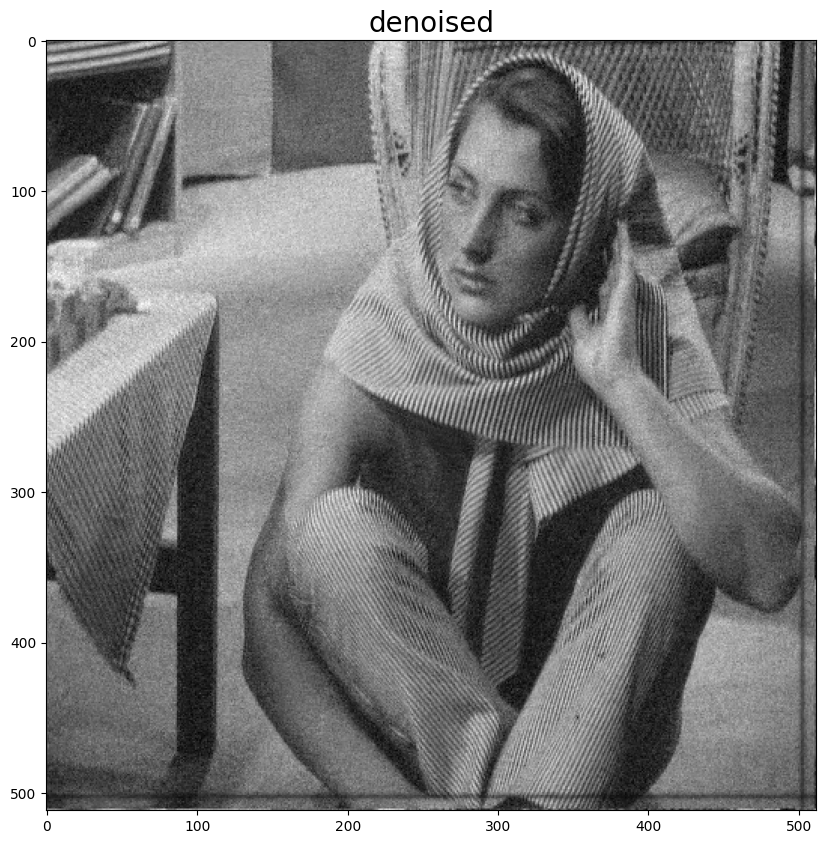

In [13]:
gray_image.show(denoised_img, "denoised")

In [14]:
print(f"time: {time.process_time()} seconds")

time: 35.988307556 seconds


In [15]:
!pip install mrcfile
import mrcfile

  Using cached mrcfile-1.4.3-py2.py3-none-any.whl (43 kB)


In [16]:
input_format = "rec"
tomogram_name = "/home/vruiz/Descargas/TS01-wbp"
tomogram_MRC = mrcfile.open(f'{tomogram_name}.{input_format}')
print(f"tomogram_name={tomogram_name} type={tomogram_MRC.data.dtype} shape={tomogram_MRC.data.shape}")
tomogram = tomogram_MRC.data

FileNotFoundError: [Errno 2] No such file or directory: '/home/vruiz/Descargas/TS01-wbp.rec'

In [ ]:
denoised_tomogram = _2D_OF_denoising.filter_over_Y(tomogram, kernel, l=2, w=3)

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import *
import cv2

In [ ]:
def g(z=0):
  #cv2_imshow(cv2.normalize(tomogram[z, :, :][0:200,0:200].astype(np.uint8), None, 0, 255, cv2.NORM_MINMAX))
  #cv2_imshow(cv2.normalize(tomogram[z, :, :].astype(np.uint8), None, 0, 255, cv2.NORM_MINMAX))
  plt.imshow(cv2.normalize(tomogram[z, :, :], None, 0, 255, cv2.NORM_MINMAX))
  plt.imshow(cv2.normalize(denoised_tomogram[z, :, :], None, 0, 255, cv2.NORM_MINMAX))

interactive_plot = interactive(g, z=100)
interactive_plot

In [ ]:
fake_tomogram = np.stack([np.roll(noisy_img,0) for i in range(64)])

In [ ]:
def g(z=0):
  plt.imshow(cv2.normalize(fake_tomogram[:, z, :], None, 0, 255, cv2.NORM_MINMAX))

interactive_plot = interactive(g, z=10)
interactive_plot

In [ ]:
fake_denoised_tomogram = _2D_OF_denoising.filter_over_X(fake_tomogram, kernel, l=2, w=3)

In [ ]:
try:
    import optical_flow as motion
    import display
    import prediction
except:
    !pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"
    from motion_estimation import optical_flow as motion
    from motion_estimation import display
    from motion_estimation import prediction

In [ ]:
initial_MVs = np.zeros((fake_tomogram[:, 0, :].shape[0], fake_tomogram[:, 0, :].shape[1], 2), dtype=np.float32)
MVs = motion.Farneback_ME(predicted=fake_tomogram[:, 10, :], reference=fake_tomogram[:, 15, :], initial_MVs=initial_MVs)

In [ ]:
#display.show_vectors(MVs[::1, ::1])
display.show_vectors(MVs)

In [ ]:
np.max(MVs)

In [ ]:
MVs[32,...]

In [ ]:
initial_MVs = np.zeros((tomogram[:, 0, :].shape[0], tomogram[:, 0, :].shape[1], 2), dtype=np.float32)
MVs = motion.Farneback_ME(predicted=tomogram[:, 1, :], reference=tomogram[:, 2, :], initial_MVs=initial_MVs)

In [ ]:
np.max(MVs)

In [ ]:
tomogram.dtype

In [ ]:
fake_tomogram.dtype

In [ ]:
RGB_image.show(display.colorize(MVs))